In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import Formatter    # to convert xaxis label to dates
from datetime import datetime, timedelta
import pytz
import pandas as pd
import datetime
from datetime import date
import time
import numpy as np


from lz_ignition_dbi.lz_ignition_dbi import IDBIWrapper
import lz_ignition_dbi.lz_ignition_bindata as bindata

#starting from here:
#https://gitlab.com/luxzeplin/sharing/slowcontrolanalysis/-/blob/main/DetectorStatusChecks.ipynb

/cvmfs/lz.opensciencegrid.org/external/Python/3.8.9_CI/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [12]:
tags  = ['5505OHM', '5502DO', 'RAD73', 'DAVISP', 'DAVIST', '6405FM', '6401FM', '6233PT', '6232PT', '6231PT', '6405RG',
        'S1ODROW1', 'S1ODROW2', 'S1ODROW3', 'S1ODROW4', 'S1ODROW5', 'S1ODROW6', 'OD1Temp', 'OD2Temp', 'OD3Temp']
label = ['[MOhm/cm]', '[ppb]', '[counts]', 'mbar', '[C]', 'flow', 'flow', '[mbar]',  '[mbar]', '[mbar]', 'setpoint', 
         '[Hz]', '[Hz]', '[Hz]', '[Hz]', '[Hz]', '[Hz]', '[C]', '[C]', '[C]']
color = ['b', 'r', 'darkorange', 'peru', 'salmon', 'powderblue', 'cadetblue', 'lime', 'limegreen', 'seagreen', 'darkslategrey',
        'steelblue', 'lightslategrey', 'slateblue', 'darkslateblue',  'midnightblue',  'lightblue', 'maroon', 'lightcoral', 'peachpuff']

df=pd.DataFrame(list(zip(tags, label, color)),
              columns=['tags','label', 'color'])

days_past=1


In [13]:
axis_type = 'dateLabel' 
#TIMEZONE='US/Mountain'
#DATEFORMAT='%Y-%-m-%-dT%H:%M' # see https://strftime.org/ 

TIMEZONE = 'US/Mountain'
DATEFORMAT = '%Y-%-m-%-dT%H:%M'  # see https://strftime.org/

class DateFormat(Formatter):
    """
    This class converts the seconds since unix epoch to date strings
    """
    def __init__(self, format=None, timezone=None):
        self.format = format if format is not None else '%Y-%m-%dT%H:%M'
        self.timezone = timezone if timezone is not None else 'US/Mountain'

    def __call__(self, x, pos=None):
        tz = pytz.timezone(TIMEZONE)
        newticklabel = datetime.datetime.fromtimestamp(x).astimezone(tz).strftime(self.format)
        return newticklabel

dateformatter = DateFormat(DATEFORMAT, TIMEZONE)


In [14]:
# Retrieve the slow control data from the Ignition DB, '2021-12-23T09:30:00' start of SR1

end = datetime.datetime.fromtimestamp(time.time()) # Get today's date
start = end - datetime.timedelta(days=days_past)           # Get date from a week ago
end = end.isoformat()                              # Convert to correct format
start = start.isoformat()

idbi = IDBIWrapper(known_tags_file='/global/u2/p/penning/work/od_ignition_mon/bp_tag_map_PMTs.json')
idbi.select(tags, start, end)
data = idbi.resolve(dateformat='unix')

# DBI returns times in units of ms. Convert to s for formatter
for t in tags:
    data[t]['times'] = [ x/1000. for x in data[t]['times'] ]    
 


In [15]:
#type(data['5505OHM'])
#df_data=pd.DataFrame.from_dict(data)
#print(df_data['5505OHM']['vals'][0])
#counter=0
#myList = [data[i][0] for i in sorted(data.keys()) ]
#print(myList)
#for key, value in data:
#    print(key, '->', value)
#    counter=+1
#    if counter>3:
#        break
#indexAge = df_data[(int(df_data['5505OHM']['vals'][0]) < '16.739')].index

#tags2=['5505OHM']
#start2=end - datetime.timedelta(days=4)
#start2.isoformat()
#idbi.select(tags2, start2, end)
#data2 = idbi.resolve(dateformat='unix')
# DBI returns times in units of ms. Convert to s for formatter
#for t in tags2:
#    data2[t]['times'] = [ x/1000. for x in data2[t]['times'] ]  
#plt.plot(data2['5505OHM']['times'], data2['5505OHM']['vals'], 'r', label='R')
#ax = plt.gca()
#ax.set_ylim(16, 16.2)


5505OHM


<Figure size 432x288 with 0 Axes>

5502DO


<Figure size 432x288 with 0 Axes>

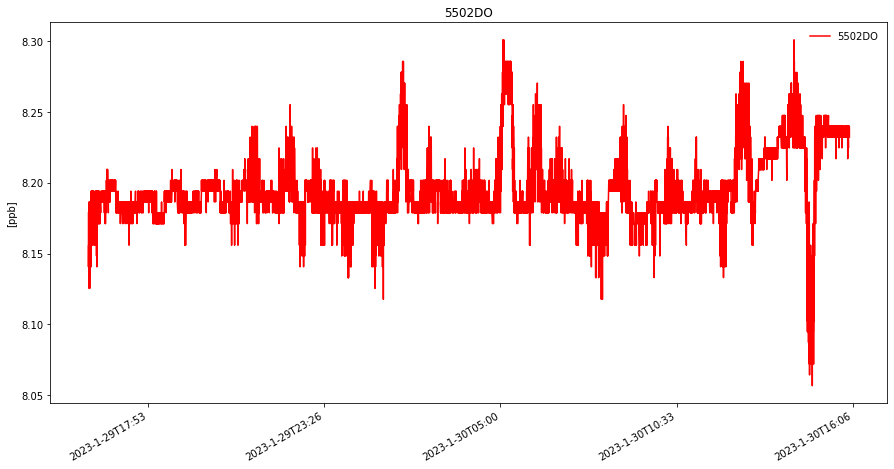

RAD73


<Figure size 432x288 with 0 Axes>

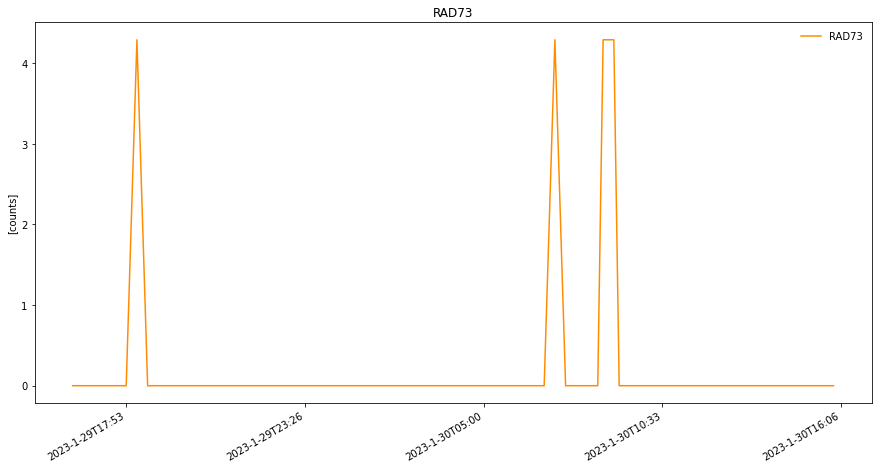

DAVISP


<Figure size 432x288 with 0 Axes>

DAVIST


<Figure size 432x288 with 0 Axes>

6405FM


<Figure size 432x288 with 0 Axes>

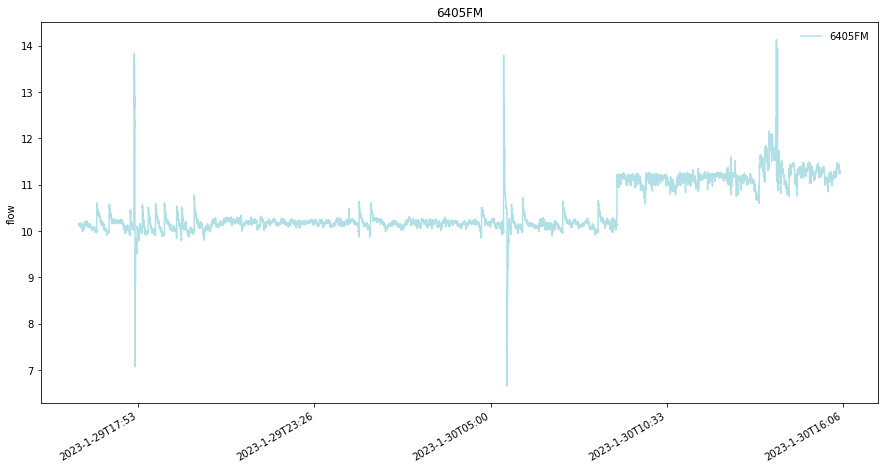

6401FM


<Figure size 432x288 with 0 Axes>

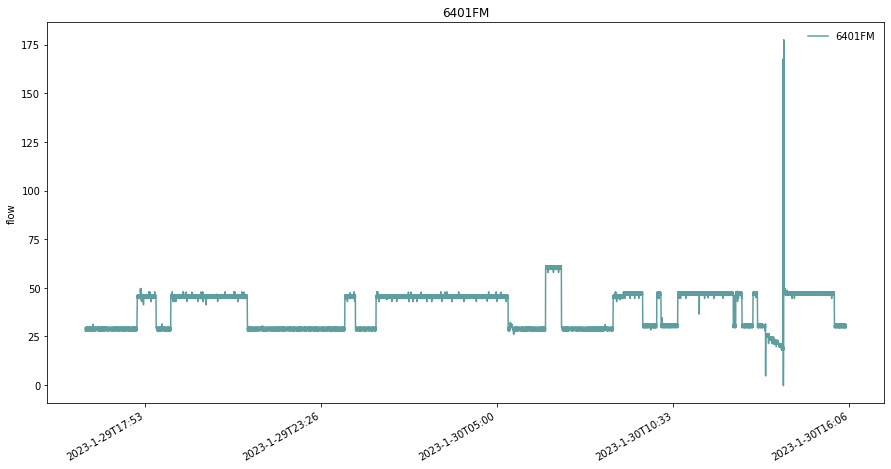

6233PT


<Figure size 432x288 with 0 Axes>

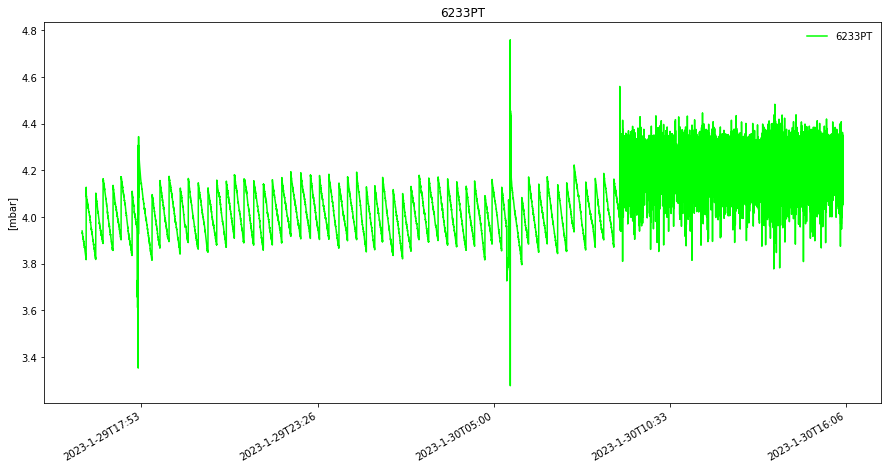

6232PT


<Figure size 432x288 with 0 Axes>

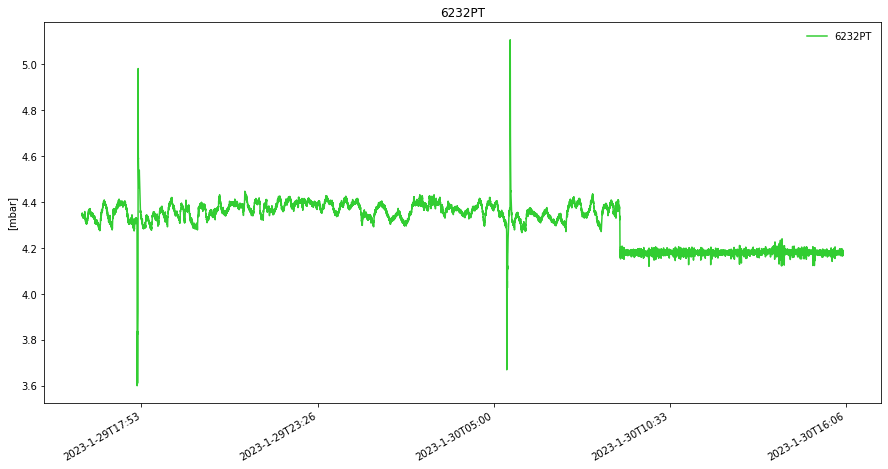

6231PT


<Figure size 432x288 with 0 Axes>

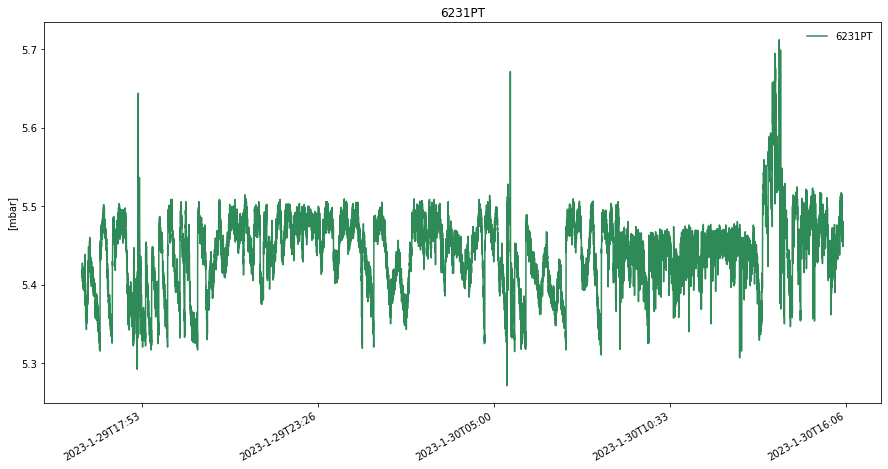

6405RG


<Figure size 432x288 with 0 Axes>

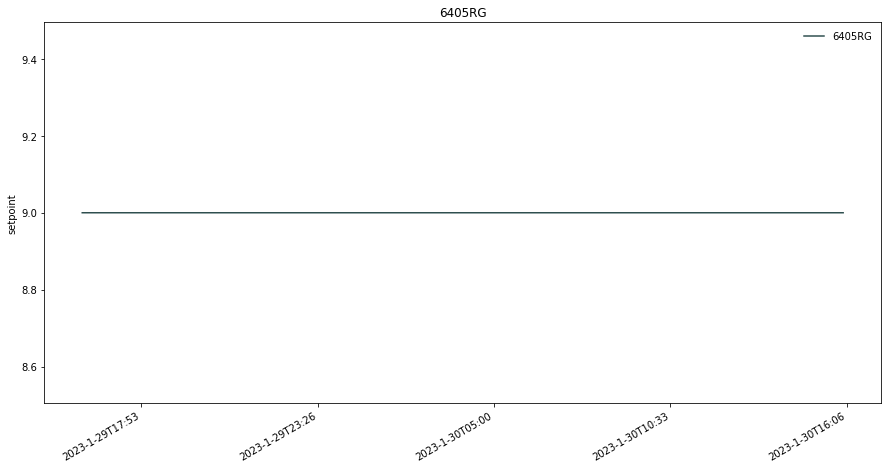

S1ODROW1


<Figure size 432x288 with 0 Axes>

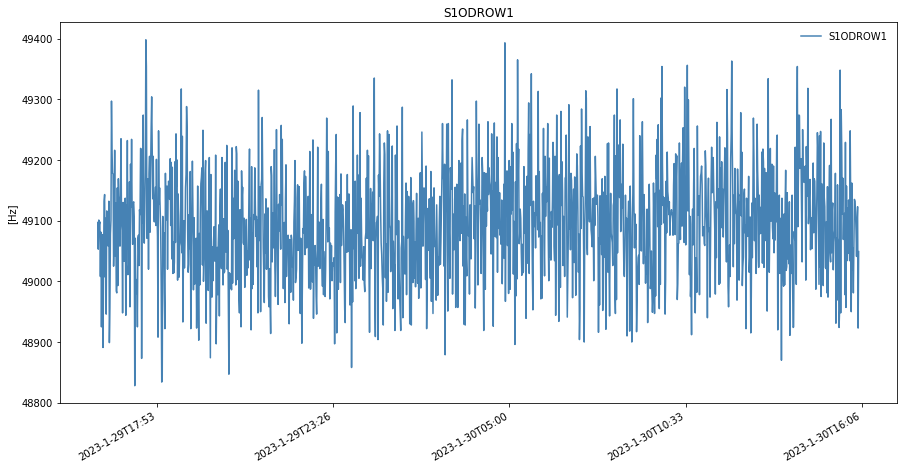

S1ODROW2


<Figure size 432x288 with 0 Axes>

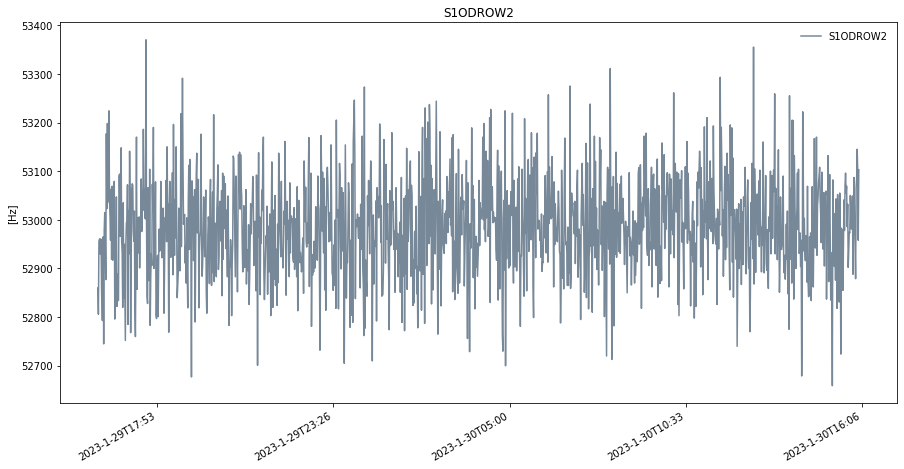

S1ODROW3


<Figure size 432x288 with 0 Axes>

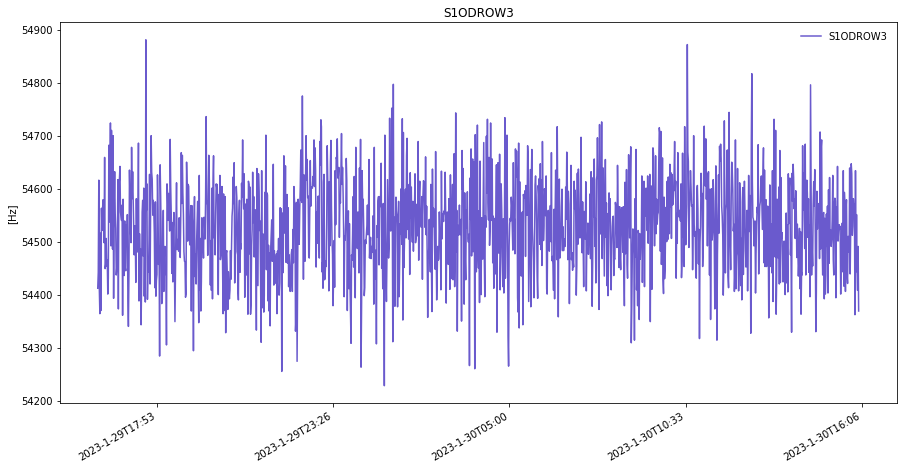

S1ODROW4


<Figure size 432x288 with 0 Axes>

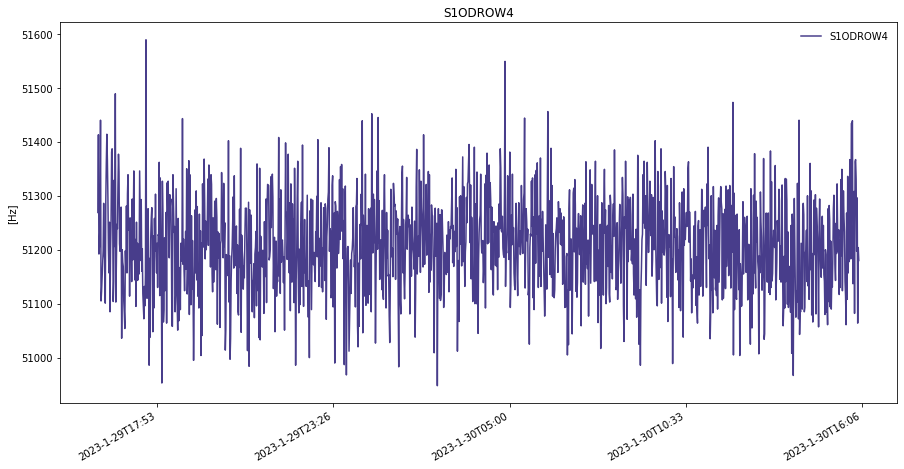

S1ODROW5


<Figure size 432x288 with 0 Axes>

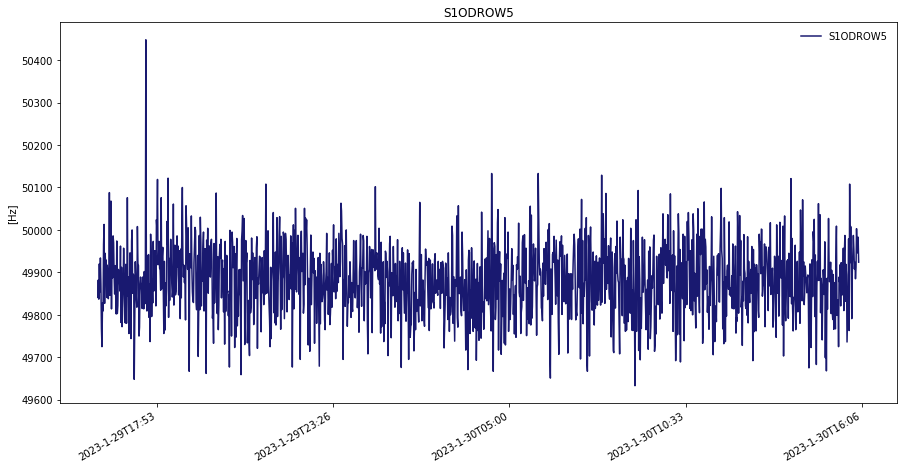

S1ODROW6


<Figure size 432x288 with 0 Axes>

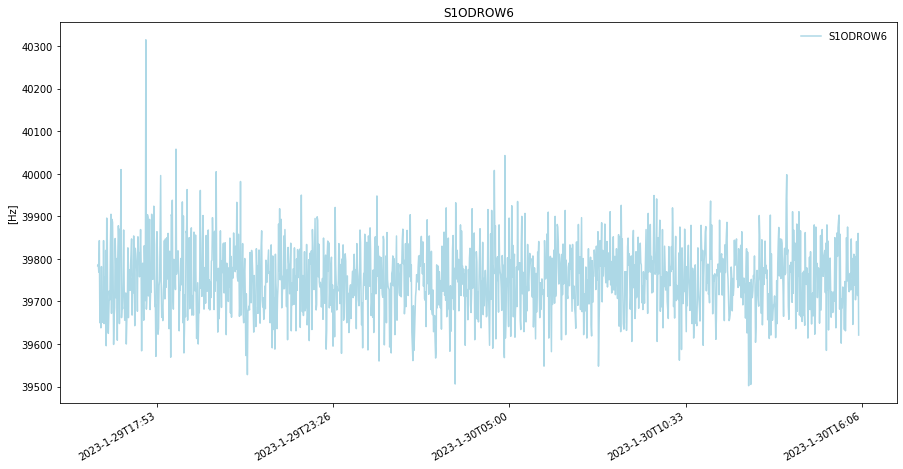

OD1Temp


<Figure size 432x288 with 0 Axes>

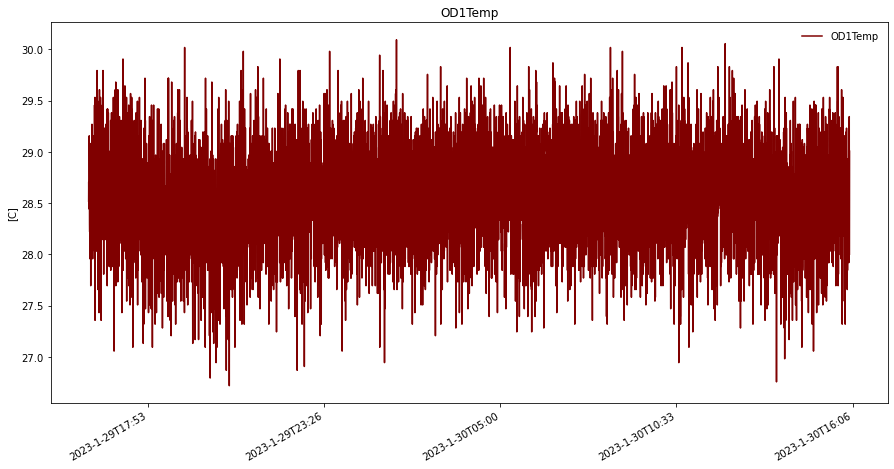

OD2Temp


<Figure size 432x288 with 0 Axes>

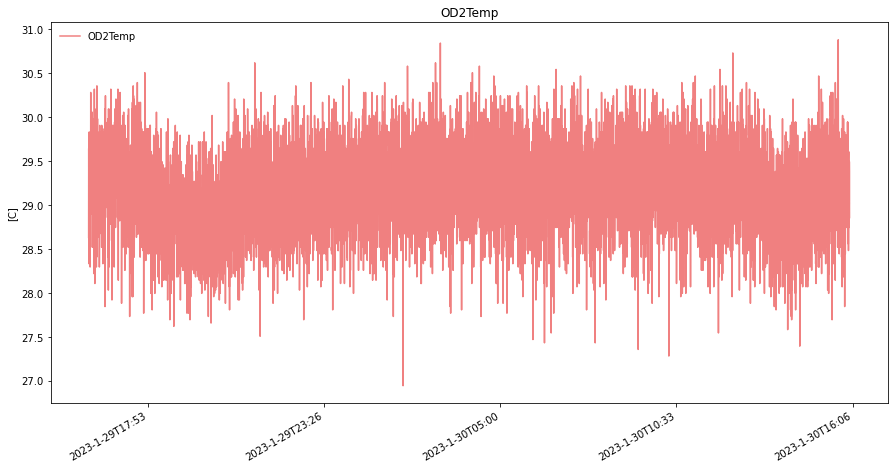

OD3Temp


<Figure size 432x288 with 0 Axes>

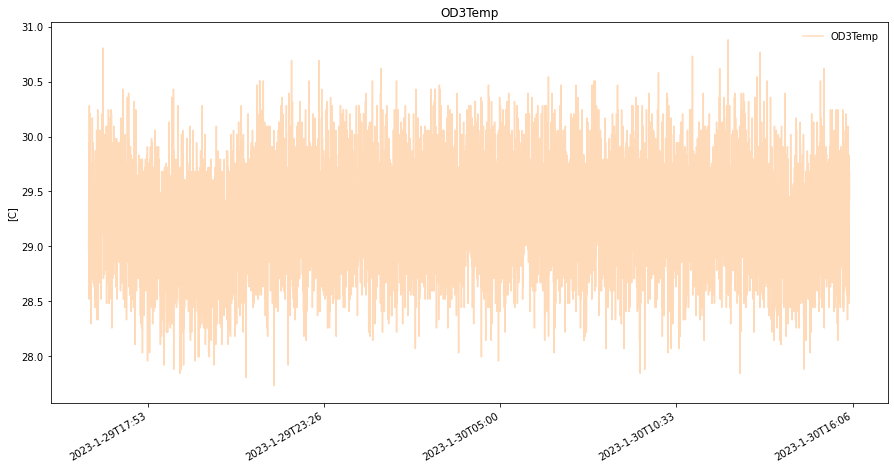

In [16]:
counter=0
for t in tags:
    print(t)
    fig = plt.figure()
    plt.figure(linewidth=1, figsize=(15, 7))
    ax = plt.gca()
    ax.plot(data[t]['times'], data[t]['vals'], color[counter], label=t)
    plt.title(t)
    plt.ylabel(label[counter])
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    for tick in ax.xaxis.get_majorticklabels():
            tick.set_horizontalalignment('right')
            tick.set_rotation(30)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    plt.show()
    counter+=1



In [7]:
def plotIgnition(fname,ylabel,ax=None,options=''):
    print('Retrieving '+fname)
    #fig = plt.figure()
    if ax is None:
        ax = plt.gca()
    # Make the plot
    ax.plot(data[fname]['times'], data[fname]['vals'], options, label=fname)
    plt.title(fname)
    plt.ylabel(ylabel)
    ax.legend(frameon=False)
    # Convert UNIX timestamps to human-readable
    ax.xaxis.set_major_formatter(dateformatter)
    # Rotate the tick labels and align them to the right
    for tick in ax.xaxis.get_majorticklabels():
        tick.set_horizontalalignment('right')
        tick.set_rotation(30)
    fig.subplots_adjust(bottom=0.2, left=0.15)
    return ax

Retrieving 5505OHM
Retrieving 5502DO
Retrieving RAD73
Retrieving DAVISP
Retrieving DAVIST
Retrieving 6405FM
Retrieving 6401FM
Retrieving 6233PT
Retrieving 6232PT
Retrieving 6231PT
Retrieving 6405RG
Retrieving S1ODROW1
Retrieving S1ODROW2
Retrieving S1ODROW3
Retrieving S1ODROW4
Retrieving S1ODROW5
Retrieving S1ODROW6
Retrieving OD1Temp
Retrieving OD3Temp
Retrieving OD2Temp


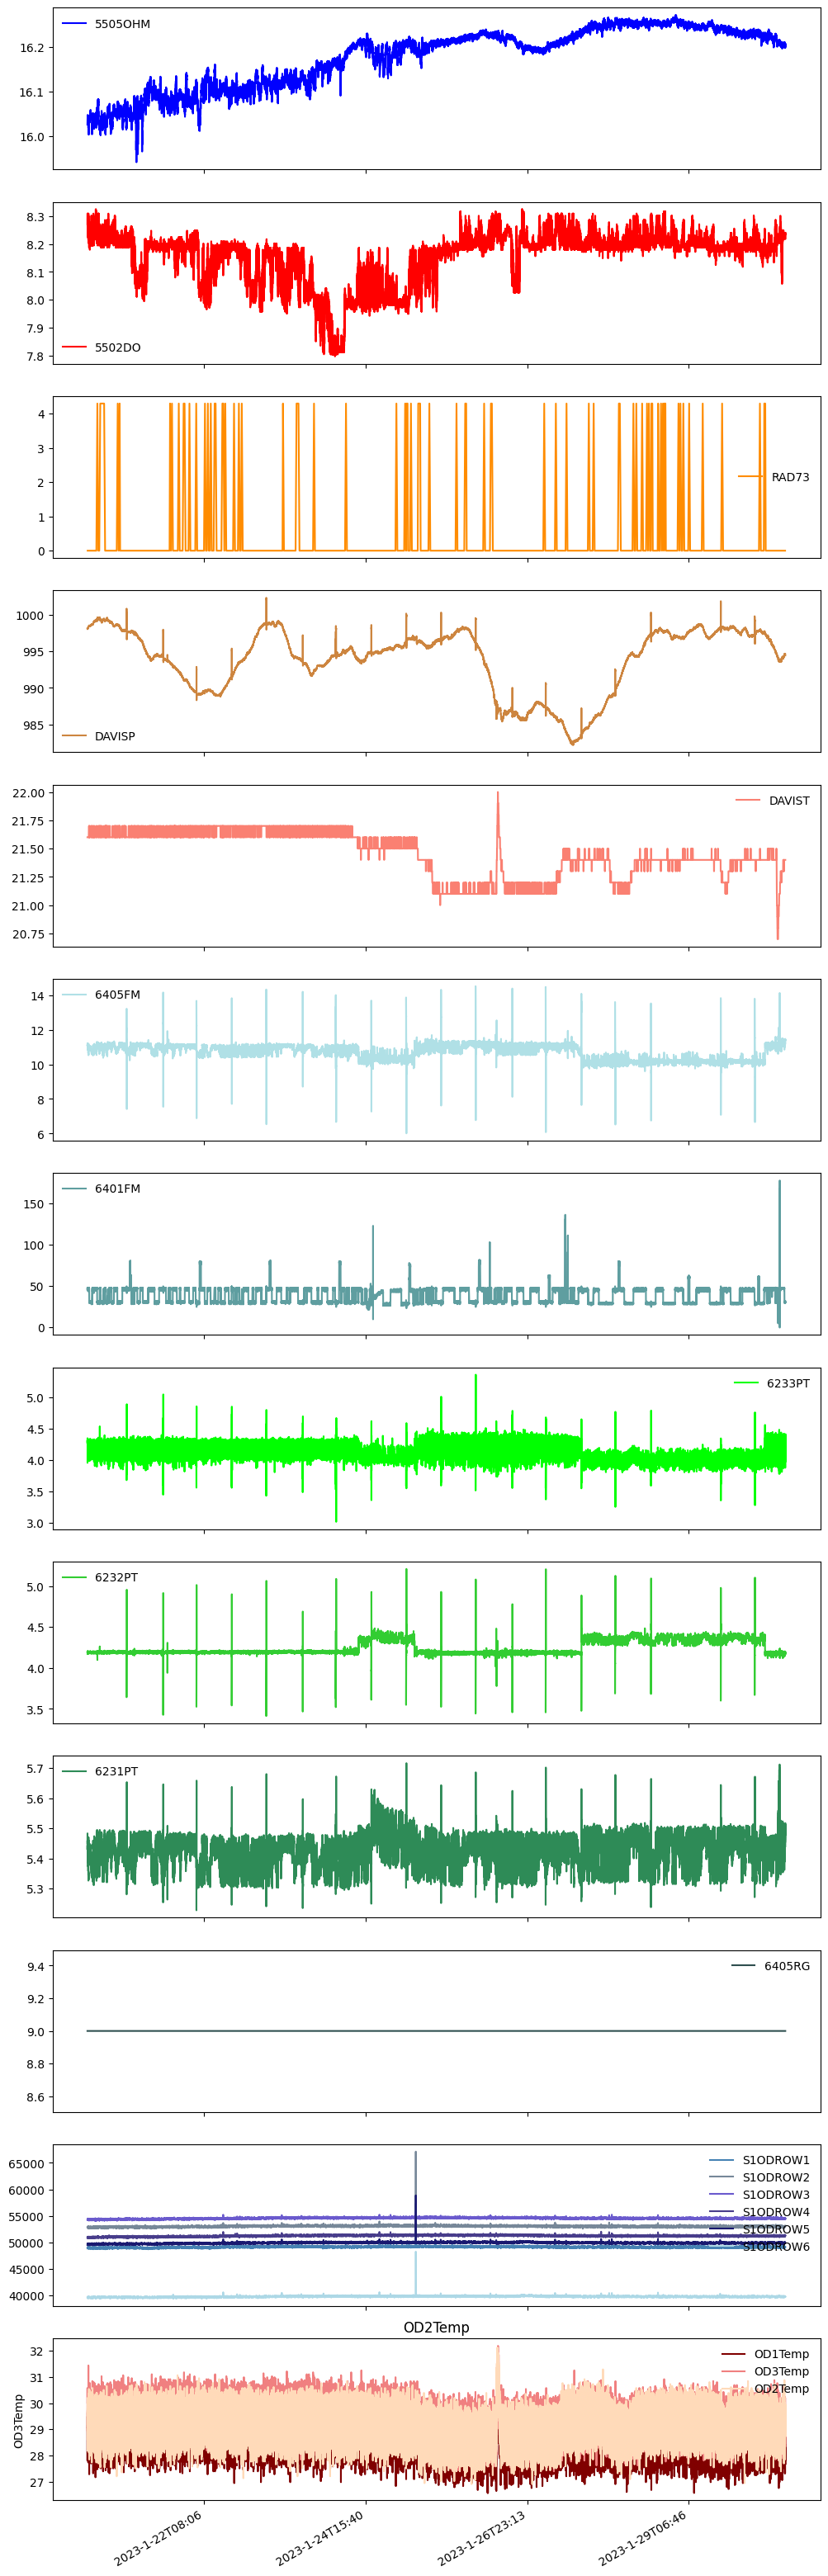

In [8]:
   
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13) = plt.subplots(13, 1, sharex=True, figsize=(12,40), dpi=100)
plotIgnition('5505OHM', 'Resistivity [MOhm/cm]', ax1, 'b')
plotIgnition('5502DO', 'DO2 [ppb]', ax2, 'r')
plotIgnition('RAD73', 'RAD [cts]', ax3, 'darkorange')
plotIgnition('DAVISP', 'p [mbar]', ax4,  'peru')
plotIgnition('DAVIST', 't [C]', ax5,  'salmon')
plotIgnition('6405FM', '6405FM', ax6,  'powderblue')
plotIgnition('6401FM', '6401FM', ax7,  'cadetblue')
plotIgnition('6233PT', '6233PT', ax8,  'lime')
plotIgnition('6232PT', '6232PT', ax9,  'limegreen')
plotIgnition('6231PT', '6231PT', ax10,  'seagreen')
plotIgnition('6405RG', '6405RG', ax11,  'darkslategrey')
plotIgnition('S1ODROW1', 'S1ODROW1', ax12,  'steelblue')
plotIgnition('S1ODROW2', 'S1ODROW2', ax12,  'lightslategrey')
plotIgnition('S1ODROW3', 'S1ODROW3', ax12,  'slateblue')
plotIgnition('S1ODROW4', 'S1ODROW4', ax12,  'darkslateblue')
plotIgnition('S1ODROW5', 'S1ODROW5', ax12,  'midnightblue')
plotIgnition('S1ODROW6', 'S1ODROW6', ax12,  'lightblue')
plotIgnition('OD1Temp', 'OD1Temp', ax13,  'maroon')
plotIgnition('OD3Temp', 'OD2Temp', ax13,  'lightcoral')
plotIgnition('OD2Temp', 'OD3Temp', ax13,  'peachpuff')
f.savefig('monitor.png')